<a href="https://colab.research.google.com/github/flammarionick/MLOP/blob/main/ML_Pipeline_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn matplotlib opencv-python seaborn joblib

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib
from google.colab import files
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_dir = "/content/drive/MyDrive/archive (5)/fruits-360_100x100/fruits-360/Training"


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


# ✅ Define dataset path
train_dir = "/content/drive/MyDrive/archive (5)/fruits-360_100x100/fruits-360/Training"
test_dir = "/content/drive/MyDrive/archive (5)/fruits-360_100x100/fruits-360/Test"

selected_classes = ["Corn 1", "Apple 10", "Pineapple Mini", "Cherry 1", "Cucumber 1", "Tomato 9", "Apple Red 1"]



In [12]:
img_size = 64
batch_size = 32

# Training data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    classes=selected_classes,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    classes=selected_classes,
    class_mode='categorical',
    subset='validation'
)


Found 2404 images belonging to 7 classes.
Found 599 images belonging to 7 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,055 (6.20 MB)

 Trainable params: 1,626,055 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save best model based on validation loss
checkpoint = ModelCheckpoint(
    "best_model.h5",           # File name
    monitor='val_loss',        # Metric to monitor ('val_accuracy' also works)
    save_best_only=True,       # Only save model if it's the best so far
    mode='min',                # 'min' for loss, 'max' for accuracy
    verbose=1
)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint]   # 👈 Include it here
)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9995 - loss: 0.0019
Epoch 1: val_loss improved from inf to 0.00873, saving model to best_model.h5


76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9983 - val_loss: 0.0087
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9998 - loss: 0.0019
Epoch 2: val_loss improved from 0.00873 to 0.00010, saving model to best_model.h5


76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.0239e-04
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9995 - loss: 0.0017
Epoch 3: val_loss improved from 0.00010 to 0.00002, saving model to best_model.h5


76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 2.0538e-05
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9975 - loss: 0.0047
Epoch 4: val_loss did not improve from 0.00002
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9975 - loss: 0.0048 - val_accuracy: 0.9900 - val_loss: 0.0185
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9937 - loss: 0.0194
Epoch 5: val_loss did not improve from 0.00002
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - accuracy: 0.9937 - loss: 0.0194 - val_accuracy: 1.0000 - val_loss: 4.1576e-05
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9953 - loss: 0.0141
Epoch 6: val_loss did not improve from 0.00002
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9967 - val_loss: 0.0082
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9988 - loss: 0.0039
Epoch 7: val_loss did not improve f

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Corn 1       0.13      0.13      0.13        90
    Apple 10       0.24      0.24      0.24       139
    Cherry 1       0.14      0.14      0.14        98
  Cucumber 1       0.07      0.07      0.07        30
    Tomato 9       0.25      0.25      0.25       144
 Apple Red 1       0.22      0.22      0.22        98

    accuracy                           0.20       599
   macro avg       0.18      0.18      0.18       599
weighted avg       0.20      0.20      0.20       599



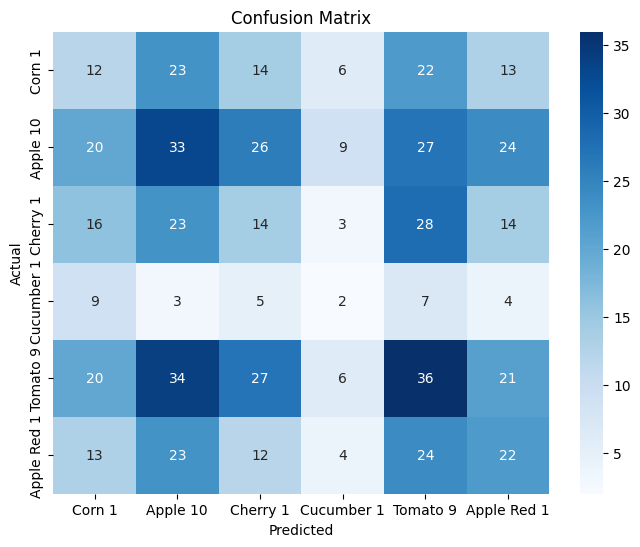

In [19]:
from sklearn.utils.multiclass import unique_labels

# Reset generator and predict
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# Get only the labels present in y_true
labels = unique_labels(y_true, y_pred)
class_indices = val_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}
target_names = [inv_class_indices[i] for i in labels]

# Print classification report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, labels=labels, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.h5")

In [21]:
from google.colab import files
files.download("best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>